# A2 v2.1

In [2]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import importlib

import Network

# Q4: Implementing Backprop

# Classification

## Create a Classification Dataset

In [3]:
# 5 Classes in 8-Dimensional Space
InputClasses = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
OutputClasses = np.array([[1,0,0,0,0],
                          [0,1,0,0,0],
                          [0,0,1,0,0],
                          [0,0,0,1,0],
                          [0,0,0,0,1]], dtype=float)
n_input = np.shape(InputClasses)[1]
n_output = np.shape(OutputClasses)[1]
n_classes = np.shape(InputClasses)[0]

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)
    t = OutputClasses[k,:]
    training_input.append(x)
    training_output.append(t)

# Create a test dataset
n_samples = 100
test_output = []
test_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)
    t = OutputClasses[k,:]
    test_input.append(x)
    test_output.append(t)

train = [training_input, training_output]
test = [test_input, test_output]

## Neural Network Model

In [4]:
# Create a Network
net = Network.Network([n_input, 10, n_output], type='classifier')


In [5]:
# Evaluate it before training
CE = net.Evaluate(train)
accuracy = net.ClassificationAccuracy(train)
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 4.02863395124
     Accuracy = 20.0%


In [6]:
net.Learn([training_input, training_output], epochs=500)

A Jupyter Widget

## Evaluate it After Training

In [7]:
# On training dataset
CE = net.Evaluate(train)
accuracy = net.ClassificationAccuracy(train)
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 0.180567269697
     Accuracy = 99.0%


In [8]:
# On test dataset
CE = net.Evaluate(test)
accuracy = net.ClassificationAccuracy(test)
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 4.62641553524
     Accuracy = 52.0%


# Regression

## Create a Regression Dataset

In [18]:
# 1D -> 1D (linear mapping)
n_input = 1
n_output = 1
slope = np.random.rand() - 0.5
intercept = np.random.rand()*2. - 1.

def myfunc(x):
    return slope*x+intercept

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx]
    t = myfunc(x) + np.random.normal(scale=0.1)
    training_input.append(np.array([x]))
    training_output.append(np.array([t]))

# Create a testing dataset
n_samples = 100
test_input = []
test_output = []
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx] + np.random.normal(scale=0.1)
    t = myfunc(x) + np.random.normal(scale=0.1)
    test_input.append(np.array([x]))
    test_output.append(np.array([t]))

# Create a perfect dataset
n_samples = 100
perfect_input = []
perfect_output = []
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = test_input[idx]
    t = myfunc(x[0])
    perfect_input.append(np.array(x))
    perfect_output.append(np.array([t]))
    
train = [training_input, training_output]
test = [test_input, test_output]
perfect = [perfect_input, perfect_output]

## Neural Network Model

In [19]:
net = Network.Network([1, 20, 1], type='regression')

In [20]:
# Evaluate it before training
mse = net.Evaluate(train)
print('MSE = '+str(mse))

MSE = 0.163165640593


## Training

In [21]:
net.Learn(train, epochs=500)

A Jupyter Widget

## Evaluate it After Training

In [22]:
# On training dataset
mse = net.Evaluate(train)
print('Training MSE = '+str(mse))

Training MSE = 0.0100383248672


In [23]:
# On test dataset
mse = net.Evaluate(test)
print('Test MSE = '+str(mse))

Test MSE = 0.0112307211479


In [24]:
# On perfect dataset
mse = net.Evaluate(perfect)
print('Perfect MSE = '+str(mse))

Perfect MSE = 0.000199553628792


In [25]:
# Evaluate our model and the TRUE solution (since we know it)
s = np.linspace(-1, 1, 200)
y = [net.FeedForward([x]) for x in s]
p = [myfunc(x) for x in s]

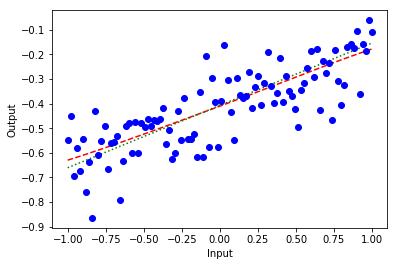

In [26]:
# Plot the training data,
# as well as out model and the true model
plt.plot(s,y, 'r--')
plt.plot(s,p, 'g:')
plt.plot(training_input, training_output, 'bo')
plt.xlabel('Input')
plt.ylabel('Output');